# The Composite Pattern

### Problem

The `Composite design pattern is a structural pattern` useful for hierarchical management.

For example, imagine that you have two types of objects: *Products* and *Boxes*. 

A Box can contain several Products as well as a number of smaller Boxes. These little Boxes can also hold some Products or even smaller Boxes, and so on.

Say you decide to *create an ordering system* that uses these classes. Orders could contain simple products without any wrapping, as well as boxes stuffed with products...and other boxes. 

How would you determine the total price of such an order?

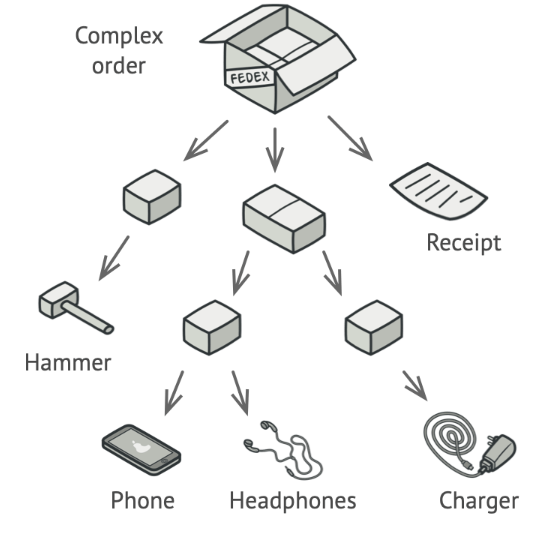

An order might comprise various products, packaged in boxes, which are packaged in bigger boxes and so on. The whole structure looks like an upside down **tree**.

You could try the direct approach: unwrap all the boxes, go over all the products and then calculate the total. 

That would be workable in the real world; but in a program, `it’s not as simple as running a loop`. 

**You have to know the classes** of *Products* and *Boxes* you’re going through, the nesting level of the boxes and other nasty details beforehand. 

All of this makes the `direct approach` either too awkward or even `impossible`.

### Solution

The **Composite Design Pattern** is a structural approach that organizes objects into tree-like structures, **uniformly treating individual objects and compositions**.

The Composite Pattern suits tasks needing a tree-like structure where elements and collections are handled similarly.

The **main idea** behind the **Composite** Pattern is `to build a tree structure of objects, where individual objects and composite objects share a common interface.` 

This *common interface* allows clients to interact with both types of objects without needing to distinguish between them.

`Whenever we have a tree-like data structure,` be it a file system, cloud stack resources, code or anything composed from smaller parts, the `Composite Pattern is the first design pattern to consider`.

**Key Components**:

* `Component Interface`: This sets the rules for all elements involved, defining common behaviors or attributes.
* * describes operations that are common to both simple and complex elements of the tree
* `Leaf`: Represents individual objects that don’t contain other elements, functioning as the basic building blocks.
* * Usually, leaf components end up doing most of the real work, since they don’t have anyone to delegate the work to.
* `Composite`: Acts as a container that can hold both Leaf and other Composite instances, forming the structure.
* * A container doesn’t know the concrete classes of its children. It works with all sub-elements only via the component interface.
* * Upon receiving a request, a container delegates the work to its sub-elements, processes intermediate results and then returns the final result to the client.

### When to Use 

The Composite Pattern suits tasks needing a tree-like structure where elements and collections are handled similarly.

* Hierarchical Structures: Employ when creating tree-like systems where elements share common handling.
* Complex Relationships: Ideal for managing intricate connections among objects, and simplifying software structures.
* Unified Element Management: Use to streamline handling various elements uniformly within software hierarchies.

### UML Class Diagram

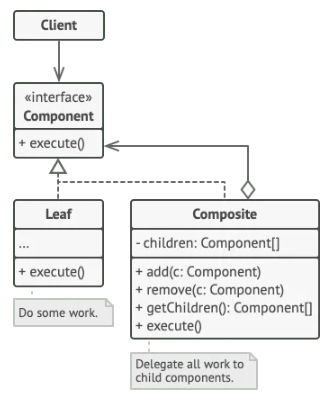

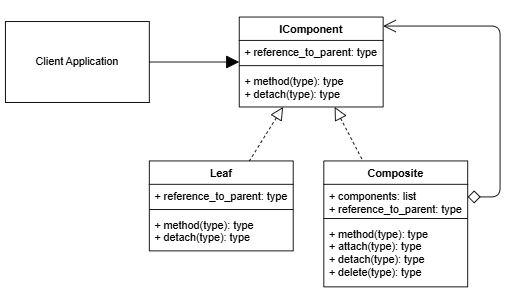

### Example 1 - an abstract implementation of the Composite pattern

In [3]:
from abc import ABC, abstractmethod

# Step 1: Define the Component Interface
class IComponent(ABC):
    """The Component interface sets the common method for all components."""

    @abstractmethod
    def execute(self):
        """The operation method needs to be implemented by Leaf and Composite classes."""
        raise NotImplementedError
    

In [7]:
# Step 2: Create Leaf Class
class Leaf(IComponent):
    """Leaf represents individual objects that don’t contain other elements."""

    def __init__(self, name):
        self.__name = name
        
    @property
    def name(self):
        return self.__name

    def execute(self):
        """Operation method for Leaf."""
        return f"Leaf: {self.__name}"

In [8]:
from typing import Type

# Step 3: Create Composite Class
class Composite(IComponent):
    """Composite acts as a container that can hold both Leaf and other Composite instances."""

    def __init__(self, name):
        self.__name = name
        self.__children: list[IComponent] = []
        
    @property
    def name(self):
        return self.__name

    def add(self, component: Type[IComponent]):
        """Method to add elements to the Composite."""
        self.__children.append(component)

    def remove(self, component: Type[IComponent]):
        """Method to remove elements from the Composite."""
        if component in self.__children:
            self.__children.remove(component)
        else:
            print(f"I don't have {component.name}, so I can't remove it.")

    def execute(self):
        """Operation method for Composite."""
        results = [f"Composite: {self.__name}"]
        for child in self.__children:
            results.append(child.execute())
        return "\n".join(results)

In [9]:
# Demonstrate the Usage in Client Code

# Creating Leaf objects
si1 = Leaf("Simple Item 1")
si2 = Leaf("Simple Item 2")
si3 = Leaf("Simple Item 3")

In [10]:
si1.name

'Simple Item 1'

In [11]:
si2.execute()

'Leaf: Simple Item 2'

In [12]:
# Creating Composite objects
box1 = Composite("Container 1")
box2 = Composite("Container 2")

# Adding Leaf elements to Composite 1
box1.add(si1)
box1.add(si2)

# Adding Leaf elements to Composite 2
box2.add(si2)
box2.add(si3)
 
# Displaying the structure and executing operations
print(box1.execute())
print(box2.execute())

Composite: Container 1
Leaf: Simple Item 1
Leaf: Simple Item 2
Composite: Container 2
Leaf: Simple Item 2
Leaf: Simple Item 3


### Example 2 - a simple in memory hierarchical file system

A root object is created that is a composite.

Several files (leaves) are created and added to the root folder.

More folders (composites) are created, and more files are added, and then the hierarchy is reordered.

In [14]:
"""
A component interface describing the common
fields and methods of leaves and composites
"""
from abc import ABC, abstractmethod


class IComponent(ABC):
    "The Component Interface"

    reference_to_parent = None

    @staticmethod
    @abstractmethod
    def dir(indent):
        "A method each Leaf and composite container should implement"
        raise NotImplementedError

    @staticmethod
    @abstractmethod
    def detach():
        """
        Called before a leaf is attached to a composite
        so that it can clean any parent references
        """
        raise NotImplementedError

In [15]:
"A File class"

class File(IComponent):
    "The File Class. The files are leaves"

    def __init__(self, name):
        self.name = name

    def dir(self, indent):
        parent_id = (id(self.reference_to_parent) if self.reference_to_parent is not None else None)
        print(
            f"{indent}<FILE> {self.name}\t\t"
            f"id:{id(self)}\tParent:\t{parent_id}"
        )

    def detach(self):
        "Detaching this file (leaf) from its parent composite"
        if self.reference_to_parent is not None:
            self.reference_to_parent.delete(self)

In [ ]:
"A Folder, that acts as a composite."

class Folder(IComponent):
    "The Folder class can contain other folders and files"

    def __init__(self, name):
        self.name = name
        self.components = []

    def dir(self, indent=""):
        print(
            f"{indent}<DIR>  {self.name}\t\tid:{id(self)}\t"
            f"Components: {len(self.components)}")
        for component in self.components:
            component.dir(indent + "..")

    def attach(self, component):
        """
        Detach file/folder from any current parent reference
        and then set the parent reference to this folder
        """
        component.detach()
        component.reference_to_parent = self
        self.components.append(component)

    def delete(self, component):
        """
        Removes file/folder from this folder so that self.components
        is cleaned
        """
        self.components.remove(component)

    def detach(self):
        "Detaching this folder from its parent folder"
        if self.reference_to_parent is not None:
            self.reference_to_parent.delete(self)
            self.reference_to_parent = None

In [18]:
"A use case of the composite pattern."
rootFolder = Folder("Root")

file1 = File("file1.txt")
file2 = File("file2.txt")
file3 = File("file3.txt")

rootFolder.attach(file1)
rootFolder.attach(file2)
rootFolder.attach(file3)

folderA = Folder("Folder_A")
rootFolder.attach(folderA)

file4 = File("file4.txt")
folderA.attach(file4)

folderB = Folder("Folder_B")
file5 = File("file5.txt")
folderB.attach(file5)

rootFolder.attach(folderB)
rootFolder.dir()

# now move FOLDER_A and its contents to FOLDER_B
print("We moved FOLDER A and its contents to FOLDER B:")
folderB.attach(folderA)
rootFolder.dir()

<DIR>  Root		id:1275184750800	Components: 5
..<FILE> file1.txt		id:1275187430368	Parent:	1275184750800
..<FILE> file2.txt		id:1275187430672	Parent:	1275184750800
..<FILE> file3.txt		id:1275185810032	Parent:	1275184750800
..<DIR>  Folder_A		id:1275184747920	Components: 1
....<FILE> file4.txt		id:1275184833104	Parent:	1275184747920
..<DIR>  Folder_B		id:1275187430976	Components: 1
....<FILE> file5.txt		id:1275184833376	Parent:	1275187430976
We moved FOLDER A and its contents to FOLDER B:
<DIR>  Root		id:1275184750800	Components: 4
..<FILE> file1.txt		id:1275187430368	Parent:	1275184750800
..<FILE> file2.txt		id:1275187430672	Parent:	1275184750800
..<FILE> file3.txt		id:1275185810032	Parent:	1275184750800
..<DIR>  Folder_B		id:1275187430976	Components: 2
....<FILE> file5.txt		id:1275184833376	Parent:	1275187430976
....<DIR>  Folder_A		id:1275184747920	Components: 1
......<FILE> file4.txt		id:1275184833104	Parent:	1275184747920
